In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


In [53]:
from sklearn.datasets import load_breast_cancer # 유방암 이진분류용 데이터셋 예제
cancer = load_breast_cancer()                   # 특성(x)과 타겟(y)을 딕셔너리 형태로 반환
cancer 


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [54]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [55]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [56]:
import torch                            # Tensor 연산
import torch.nn as nn                   # 레이어
import torch.nn.functional as F         # 활성화/손실함수
import torch.optim as optim             # 최적화 함수

In [57]:
data = torch.FloatTensor(df.values)         # df을 실수형 Tensor로 변환
data.size()     # (샘플 수, 특성 수) 형태

torch.Size([569, 31])

In [58]:
data

tensor([[1.7990e+01, 1.0380e+01, 1.2280e+02,  ..., 4.6010e-01, 1.1890e-01,
         0.0000e+00],
        [2.0570e+01, 1.7770e+01, 1.3290e+02,  ..., 2.7500e-01, 8.9020e-02,
         0.0000e+00],
        [1.9690e+01, 2.1250e+01, 1.3000e+02,  ..., 3.6130e-01, 8.7580e-02,
         0.0000e+00],
        ...,
        [1.6600e+01, 2.8080e+01, 1.0830e+02,  ..., 2.2180e-01, 7.8200e-02,
         0.0000e+00],
        [2.0600e+01, 2.9330e+01, 1.4010e+02,  ..., 4.0870e-01, 1.2400e-01,
         0.0000e+00],
        [7.7600e+00, 2.4540e+01, 4.7920e+01,  ..., 2.8710e-01, 7.0390e-02,
         1.0000e+00]])

In [59]:
x = data[:,:-1]
y = data[:,-1:]
print(x.size(),y.size())

torch.Size([569, 30]) torch.Size([569, 1])


In [60]:
# 학습 / 검증 / 테스트 데이터 비율
ratios = [.6, .2, .2]


In [61]:
# 전체 데이터 (data.size(0))를 ratios 비율에 따라 학습/검증/테스트 데이터 갯수로 분할
train_cnt = int(data.size(0) * ratios[0])               # 전체 샘플 수 x 학습 데이터 비율
valid_cnt = int(data.size(0) * ratios[1])               # 전체 샘플 수 x 검증 데이터 비율
test_cnt = data.size(0) - train_cnt - valid_cnt         # 전체 샘플 수 x 테스트 데이터 비율

cnts = [train_cnt, valid_cnt, test_cnt]                 # 데이터 분할 갯수 리스트

print(f"학습 데이터셋: {train_cnt}개, 검증 데이터셋: {valid_cnt}개, 테스트 데이터셋: {test_cnt}개")


학습 데이터셋: 341개, 검증 데이터셋: 113개, 테스트 데이터셋: 115개


torch.randperm(n)  : 0 ~ n-1가지의 숫자를 무작위로 섞은 텐서를 반환 (중복 x)

In [62]:
# 데이터를 무작위로 섞은 후에 설정한 비율에 따라 학습/검증/테스트 셋으로 나눔
indices = torch.randperm(data.size(0))      # 전체 샘플 인덱스를 무작위로 섞음
 
# 무작위로 생성된 indices를 이용해서 x, y를 같은 인덱스 순으로 셔플
x = torch.index_select(x, dim=0, index=indices) # 섞인 인덱스 순서대로 x 재정렬
y = torch.index_select(y, dim=0, index=indices) # 섞인 인덱스 순서대로 y 재정렬

x = x.split(cnts, dim=0)    # x를 train/valid/test 개수 기준으로 나눔
y = y.split(cnts, dim=0)    # y를 train/valid/test 개수 기준으로 나눔

for x_i, y_i in zip(x, y):              # 각 데이터 쌍으로 순회 (zip함수 출력결과는 tuple)
    print(x_i.size(),y_i.size())        # 분할된 데이터 크기 확인 
    


torch.Size([341, 30]) torch.Size([341, 1])
torch.Size([113, 30]) torch.Size([113, 1])
torch.Size([115, 30]) torch.Size([115, 1])


In [63]:
print(x[0])      # 학습데이터 x
print(y[0])      # 학습데이터 y


tensor([[1.2180e+01, 2.0520e+01, 7.7220e+01,  ..., 7.4310e-02, 2.6940e-01,
         6.8780e-02],
        [1.8810e+01, 1.9980e+01, 1.2090e+02,  ..., 1.2940e-01, 2.5670e-01,
         5.7370e-02],
        [1.0750e+01, 1.4970e+01, 6.8260e+01,  ..., 3.4130e-02, 2.3000e-01,
         6.7690e-02],
        ...,
        [1.4800e+01, 1.7660e+01, 9.5880e+01,  ..., 8.3080e-02, 3.6000e-01,
         7.2850e-02],
        [1.4200e+01, 2.0530e+01, 9.2410e+01,  ..., 1.3390e-01, 2.5340e-01,
         7.8580e-02],
        [9.8760e+00, 1.7270e+01, 6.2920e+01,  ..., 5.5880e-02, 2.9890e-01,
         7.3800e-02]])
tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]

- 학습 데이터 x[0]에 대해 fit() 호출하여 스케일 기준(평균, 표준편차)을 학습
- 학습/검증/테스트 데이터를 동일한 기준으로 정규화(transform())
- 각각 다시 torch.FloatTensor()로 Tensor변환하여 모델 입력에 사용할 수  있도록 함
- 정규화된 학습 데이터를 DataFrame으로 변환

In [64]:
# StandardScaler()로 정규화 (전처리) 진행
scaler = StandardScaler()       # 평균 0, 표준편차 1 스케일링 객체 생성
scaler.fit(x[0].numpy())        # 학습 데이터 기준으로 스케일 기준 학습

x = [
    torch.FloatTensor(scaler.transform(x[0].numpy())), # train 데이터 표준화
    torch.FloatTensor(scaler.transform(x[1].numpy())), # validation 데이터 표준화
    torch.FloatTensor(scaler.transform(x[2].numpy())), # test 데이터 표준화
]
df = pd.DataFrame(x[0].numpy(), columns=cancer.feature_names)   # 스케일링된 train 데이터를 DataFrame으로 변환
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.530199,0.341200,-0.584709,-0.529243,-1.104882,-1.177428,-0.799598,-0.785658,-0.204541,-0.877523,...,-0.587028,1.182735,-0.658764,-0.555958,-0.875888,-1.064147,-0.740316,-0.589797,-0.328838,-0.866452
1,1.428039,0.215099,1.284345,1.349981,-0.462552,-0.818861,-0.048312,0.316622,-0.895770,-1.874013,...,0.840149,-0.195411,0.726338,0.677659,-0.352132,-0.880486,-0.221790,0.287056,-0.534424,-1.519536
2,-0.952565,-0.954839,-0.968105,-0.831298,-1.260171,-0.963570,-0.817191,-1.051553,-1.448023,-0.861426,...,-0.886692,-0.773135,-0.870489,-0.747041,-1.081026,-0.838227,-0.822842,-1.229331,-0.966642,-0.928841
3,0.107779,-1.305120,0.069545,0.003881,0.231306,-0.480884,-0.354318,-0.018961,1.024312,-1.212613,...,0.152431,-1.389588,0.146354,0.027330,-0.116442,-0.635650,-0.503206,-0.042421,0.266878,-1.327789
4,0.261366,0.969370,0.407156,0.092102,0.608234,1.884181,1.144523,1.137986,-0.211855,0.578436,...,0.003677,0.366176,0.402046,-0.131309,-0.033514,1.459211,0.936495,0.976250,0.166513,0.176994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,-0.352983,-0.599888,-0.407132,-0.401293,0.178367,-0.945117,-0.630336,-0.489588,-0.749479,-0.912641,...,-0.561157,-0.928055,-0.624776,-0.543231,-0.120807,-1.184955,-0.791925,-0.836347,-0.832282,-1.134326
337,-0.031041,-0.665273,-0.101186,-0.134878,-0.589606,-0.895003,-0.917016,-0.699597,-1.356590,-0.576088,...,-0.205441,0.011150,-0.279592,-0.293174,-0.744949,-0.982445,-1.040477,-0.888235,-0.866277,-0.731943
338,0.243645,-0.326669,0.213746,0.102034,-0.281852,-0.234976,-0.574892,-0.653049,0.358684,-0.571698,...,0.079132,-0.447156,0.006035,-0.051003,-0.426331,-0.396850,-0.294822,-0.450207,1.137788,-0.633494
339,0.066428,0.343536,0.065266,-0.062723,-0.456905,0.190409,-0.442414,-0.437085,-1.056692,-0.391715,...,0.083444,0.282260,0.199363,-0.052796,-0.744949,0.641524,-0.074753,0.358681,-0.587844,-0.305521


```
### 모델과 옵티마이저 구성
입력층 : 특성 수 30개
은닉층 : 25 > 20 > 15 > 10 > 5 노드 수 감소
각 은닉층 사이에 LeakyReLU 활성화 함수 적용
출력층 : 1개 노드
출력층 활성화 함수 : Sigmoid 적용하여 이진 분류 확률값 출력 (0~1)
```

In [65]:
model = nn.Sequential(
    nn.Linear(x[0].size(-1),25),    # 입력 특성 수 -> 은닉층 (25)
    nn.LeakyReLU(),                 # 음수 영역도 기울기 유지 LeakyReLU 사용
    
    nn.Linear(25, 15),              # 은닉층 -> 은닉층
    nn.LeakyReLU(),                 # 음수 영역도 기울기 유지 LeakyReLU 사용
    nn.Dropout(p=0.1),
    
    nn.Linear(15, 5),              # 은닉층 -> 은닉층
    nn.LeakyReLU(),                 # 음수 영역도 기울기 유지 LeakyReLU 사용
    nn.Dropout(p=0.1),
    nn.Linear(5, y[0].size(-1)),    # 은닉층 -> 은닉층
    nn.Sigmoid()                    # 출력층 활성화함수 (sigmoid는 0과 1 사이의 값을 출력한다.)
)

model

Sequential(
  (0): Linear(in_features=30, out_features=25, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=25, out_features=15, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Dropout(p=0.1, inplace=False)
  (5): Linear(in_features=15, out_features=5, bias=True)
  (6): LeakyReLU(negative_slope=0.01)
  (7): Dropout(p=0.1, inplace=False)
  (8): Linear(in_features=5, out_features=1, bias=True)
  (9): Sigmoid()
)

모델의 학습 가능한 파라미터(model.parameters())를 대상으로 Adam 옵티마이저를 사용해 학습한다.

In [66]:
#optimizer = optim.Adam(model.parameters())  # Adam 옵티마이저로 모델 가중치 업데이트
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)


```
Adam 옵티마이저 : 학습률을 자동으로 조절해주는 대표적인 옵티마이저
model.parameters() : 업데이트할 모든 가중치
```

### 학습
- 하이퍼파라미터 설정
    - n_epochs : 전체 학습 반복 횟수
    - batch_size : 한 번에 학습할 샘플 수 (미니배치 크기)
    - print_interval : 몇 에폭마다 학습 상태(loss 등) 출력할지 설정
    - early_stop : 얼리 스탑 기준. 성능 개선이 기준만큼 없는 경우 학습을 중단할 최대 대기 에폭 수

In [67]:
n_epochs = 10000
batch_size = 32
print_interval = 100
early_stop = 50

In [68]:
np.inf

inf

deepcopy : 객체를 완전히 복사 (참조 공유 방지)

In [69]:
# 모델의 최적 상태를 추적하고 저장하기 위한 초기 설정
from copy import deepcopy       # 모델 구조와 가중치를 완전히 복사할때 사용 (best_model 저장용)
lowest_loss = np.inf            # 최소 손실값 초기화 (아주 큰 값으로 초기화)
best_model = None               # 가장 성능 좋은 모델 저장용 변수

lowest_loss = np.inf            # 최소 손실이 나온 epoch 기록 (아주 큰 값으로 초기화)
lowest_loss

inf

In [ ]:
# 학습 루프
train_history, valid_history = [], []  # 학습/검증 손실 기록 리스트

for i in range(n_epochs):
    indices = torch.randperm(x[0].size(0))  # 학습데이터 인덱스 셔플
    x_ = torch.index_select(x[0], dim=0, index=indices) # 셔플된 X
    y_ = torch.index_select(y[0], dim=0, index=indices) # 셔플된 y
    
    x_ = x_.split(batch_size, dim=0)        # 배치 크기(32) 단위로 분할
    y_ = y_.split(batch_size, dim=0)        # 배치 크기(32) 단위로 분할

    train_loss, valid_loss = 0,0            # epoch별 손실 초기화
    y_hat = []                              # 검증 예측값 저장용 리스트
    
    # 미니 배치 단위로 학습루프
    model.train()
    for x_i, y_i in zip(x_,y_):             # 미니배치 학습 루프
        y_hat_i = model(x_i)                # 순전파
       
        # loss = F.binary_cross_entropy(y_hat_i, y_i) # 이진 분류 손실 계산
        loss = F.binary_cross_entropy_with_logits(y_hat_i, y_i)

        optimizer.zero_grad()               # 이전 기울기 초기화
        loss.backward()                     # 가중치 업데이트
        
        optimizer.step()                    # 가중치 업데이트
        train_loss += loss.item()           # Tensor -> float (메모리 누수 방지)
        
    train_loss = train_loss / len(x_)       # 평균 학습 손실 계산


    model.eval()
    with torch.no_grad():                   # 검증 단계 (gradient 계산 안함)
        x_ = x[1].split(batch_size, dim=0)  # 검증 데이터 배치 분할
        y_ = y[1].split(batch_size, dim=0)  # 검증 데이터 배치 분할
        
        valid_loss = 0
        
        # 검증 데이터를 순회 (미니 배치 단위)
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)            # 검증용 순전파
            #loss = F.binary_cross_entropy(y_hat_i, y_i) # 검증 손실 계산
            loss = F.binary_cross_entropy_with_logits(y_hat_i, y_i)

            valid_loss += loss.item()       # 손실 누적
            
            y_hat += [y_hat_i]              # 예측값 저장
            
    valid_loss = valid_loss / len(x_)       # 평균 검증 손실 계산
    
    train_history += [train_loss]           # 평균 학습 손실 누적
    valid_history += [valid_loss]           # 평균 검증 손실 누적
    
    # 100 epoch마다 각종 손실 지표 및 가장 낮은 손실 출력
    if (i + 1)  % print_interval == 0:
        print(f"Epoch : {i+1}, train_loss: {train_loss:.4e}, valid_loss: {valid_loss:.4e}, lowest_loss: {lowest_loss:.4e}")
        
    if valid_loss <= lowest_loss :      # 검증 손실이 개선될 때
        lowest_loss = valid_loss        # 최소 손실 갱실
        lowest_epoch = i                # 해당 epoch 저장
        
        best_model = deepcopy(model.state_dict())   # 최적 모델 가중치 저장
    else:
        # early_stop 설정 and 최고 성능 이후 허용 대기 시간 < 현재 인덱스 일 경우 학습 종료
        if early_stop > 0 and lowest_epoch + early_stop < i + 1 :
            print(f"{early_stop} epoch동안 개선된 사항이 없음")
            break
    
print(f"epoch {lowest_epoch + 1}에서 최고 성능의 검증 손실은? {lowest_loss}")    

model.load_state_dict(best_model) # 최고 성능 모델

Epoch : 100, train_loss: 4.5835e-01, valid_loss: 4.9200e-01, lowest_loss: 4.9158e-01
Epoch : 200, train_loss: 4.5349e-01, valid_loss: 4.8979e-01, lowest_loss: 4.8979e-01
Epoch : 300, train_loss: 4.5346e-01, valid_loss: 4.8976e-01, lowest_loss: 4.8974e-01
50 epoch동안 개선된 사항이 없음
epoch 271에서 최고 성능의 검증 손실은? 0.4897374361753464


<All keys matched successfully>

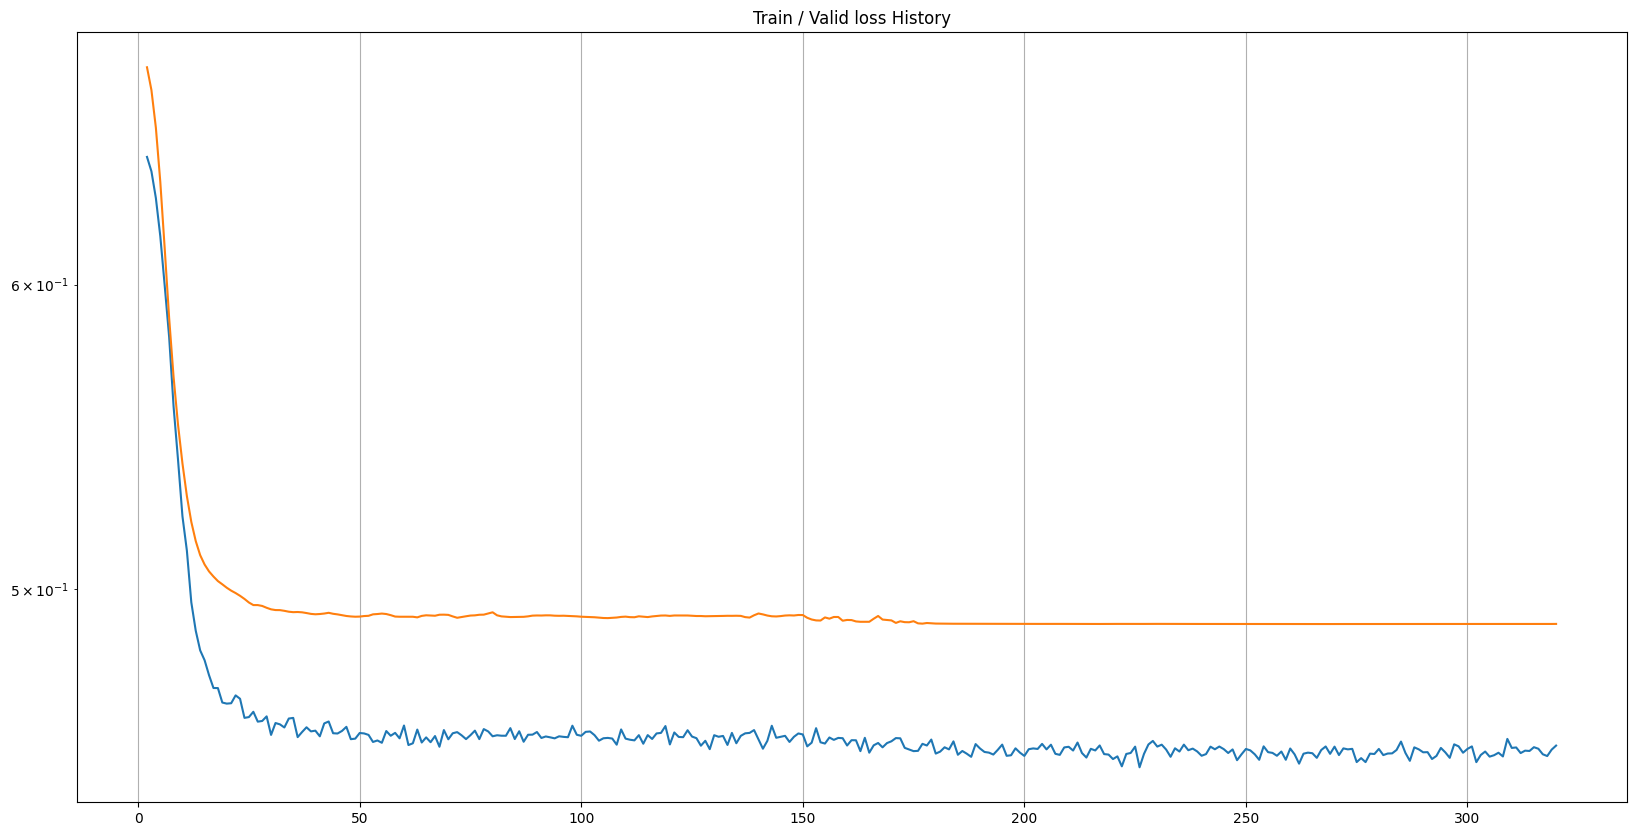

In [71]:
# 손실 기록 또는 손실 변화 이력 시각화
plot_from = 2 # 초반 에포크 건너뛰고 3번째 에폭부터 그래프 표시

plt.figure(figsize=(20,10))
plt.grid(True)
plt.title("Train / Valid loss History")
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:]
)

plt.yscale('log')   # y 축을 로그 스케일로 표시
plt.show()

In [72]:
# 결과 확인 : 테스트 데이터에서 얼마나 잘 예측하는지 평가
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        #loss = F.binary_cross_entropy(y_hat_i, y_i) #테스트 손실 계산
        loss = F.binary_cross_entropy_with_logits(y_hat_i, y_i)

        test_loss += loss       # no_grad 상태에서는 그래프 누적이 없기 때문에 float형태로 바꿔주지않아도 됨!
        
        y_hat += [y_hat_i]      # 예측 결과 저장
        
test_loss = test_loss / len(x_)    # 평균 테스트 손실 계산
y_hat = torch.cat(y_hat, dim=0)

print(f"Test loss: {test_loss:.4e}")    # 평균 테스트 손실 성능 출력

Test loss: 4.7601e-01


In [73]:
# 학습된 모델이 테스트셋에서 얼마나 정확하게 분류했는지를 평가
prob = torch.sigmoid(y_hat)      # 로짓 -> 확률
pred = (prob > 0.5)
correct_cnt = (y[2] == pred).sum()
#correct_cnt = (y[2] == (y_hat > .5)).sum() #예측 확률으로 0.5 기준으로 이진화해서 정답 개수 계산
total_cnt = float(y[2].size(0))                     # 전체 테스트 샘플 수
print(f"Test Accuracy: {correct_cnt / total_cnt}")  # 테스트 정확도 출력

Test Accuracy: 0.947826087474823


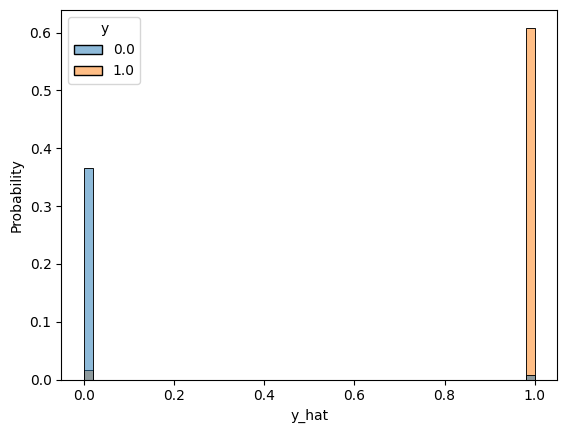

In [74]:
# 이진 분류 결과의 예측 확률 분포를 실제 정답별로 시각화
df = pd.DataFrame(
    torch.cat([y[2], y_hat], dim=1)     # 실제값(y)와 예측확률(y_hat)을 열 방향(dim=1)로 병합
    .detach()                           # autograd 그래프에서 분리
    .numpy(),                           # 지정
    columns=['y','y_hat']               # 실제값 컬럼 , 예측확률 컬럼 이름 지정
)

sns.histplot(
    df,                     # 데이터는 df
    x='y_hat',              # x축은 모델이 예측한 확률값
    hue='y',                # 색상 구분 기준 : 실제 클래스 (0/1)
    bins=50,                # 히스토그램 막대 개수 50개
    stat='probability'      # 빈도를 확률(비율)로 정규화
)

plt.show()

In [75]:
# 모델의 확률 기반 분류 성능을 종합적으로 측정하는 지표(auc) 계산
from sklearn.metrics import roc_auc_score # ROC 곡선 (아래에 면적 AUC) 계산 함수

roc_auc_score(
    df.values[:,0],         # 실제 정답 레이블 (0/1)
    df.values[:,1]          # 예측 확률값 (y_hat : 0~1)
)


0.999031007751938

```
ROC 곡선 : 분류 모델의 판단 기준(threshold)를 바꿔가면서 진짜 양성(True Positive)과 거짓 양성(False Positive)의 관계를
그린 곡선
=> 확률 기준을 느슨하게 / 엄격하게 바꿨을때 맞추는 비율과 잘못 맞추는 비율이 어떻게 변하는가를 확인한다.

AUC(ROC 곡선 아래 면적) 지표 확인
0.5 -> 랜덤 추측 정도
1.0 -> 완벽한 분류
값이 클수록 클래스 분리 능력이 좋다.
```